In [ ]:
%load_ext autoreload
%autoreload 2


In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
def prepare_data():
    with open('a.pickle', 'rb') as f:
        stocks = pickle.load(f)
        df = pd.DataFrame([])
        for s in stocks:
            s['data']['symbol'] = s['symbol']
            s['data'] = s['data'].reset_index()
            s['data'].rename(columns={'date': 'Date'})
            s['data']['Date'] = pd.to_datetime(s['data']['Date'], format='%Y-%m-%d')
            ta_init(df)
            df = df.append(s['data'], ignore_index=True)
        return df

def sma(df:pd.DataFrame, length:int):
    df[f'SMA_{length}']=df['Close'].rolling(window=length).mean()
    return df
    
def ema(df:pd.DataFrame, length:int):
    df[f'EMA_{length}'] = df['Close'].ewm(span=length, adjust=False).mean()
    return df
    

In [3]:
df = pd.read_feather('bursa.feather')
df.drop(df[df['Volume'] == 0].index, inplace=True)

df.set_index(keys=['Date'], inplace=True)

In [ ]:

df = df.groupby('symbol').apply(
    lambda x: ema(sma(sma(x, 20), 100), 20)
)


In [5]:
stock = df[df['symbol'] == 'AIRASIA']

Text(0, 0.5, 'Price in $')

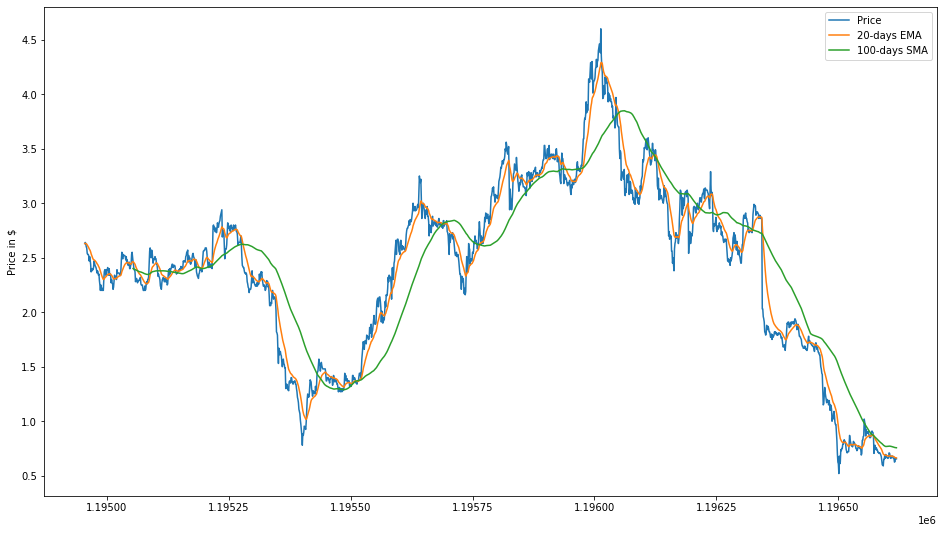

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(stock.index, stock['Close'], label='Price')
ax.plot(stock.index, stock['EMA_20'], label='20-days EMA')
# ax.plot(stock.index, stock['SMA_20'], label='20-days SMA')
ax.plot(stock.index, stock['SMA_100'], label='100-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')


In [55]:
df.groupby('symbol').count()

,Date,Open,Low,High,Close,Volume
symbol,,,,,,
3A,1668,1668,1668,1668,1668,1668
AASIA,1346,1346,1346,1346,1346,1346
AAX,1675,1675,1675,1675,1675,1675
ABLEGRP,1458,1458,1458,1458,1458,1458
ABMB,1666,1666,1666,1666,1666,1666
...,...,...,...,...,...,...
YTLPOWR,1675,1675,1675,1675,1675,1675
YTLREIT,1675,1675,1675,1675,1675,1675
ZECON,1631,1631,1631,1631,1631,1631


In [72]:
df.shape

(1330721, 8)

In [71]:
df[df['symbol'] == 'AJIYA'].head(30)

,Date,Open,Low,High,Close,Volume,symbol,sma_20
0,2013-11-06,0.558,0.558,0.558,0.558,20000,AJIYA,NaN
1,2013-11-07,0.558,0.558,0.558,0.558,20000,AJIYA,NaN
2,2013-11-08,0.558,0.558,0.558,0.558,48000,AJIYA,NaN
3,2013-11-11,0.563,0.558,0.563,0.558,27600,AJIYA,NaN
4,2013-11-12,0.553,0.553,0.555,0.555,20000,AJIYA,NaN
5,2013-11-13,0.550,0.548,0.553,0.553,166000,AJIYA,NaN
6,2013-11-14,0.553,0.553,0.553,0.553,0,AJIYA,NaN
7,2013-11-15,0.553,0.553,0.553,0.553,40000,AJIYA,NaN
8,2013-11-18,0.550,0.550,0.555,0.555,91600,AJIYA,NaN
9,2013-11-19,0.555,0.555,0.555,0.555,32000,AJIYA,NaN


In [51]:
df[df['symbol']=='AJIYA'].

,Date,Open,Low,High,Close,Volume,symbol
0,2013-11-06,0.558,0.558,0.558,0.558,20000,AJIYA
1,2013-11-07,0.558,0.558,0.558,0.558,20000,AJIYA
2,2013-11-08,0.558,0.558,0.558,0.558,48000,AJIYA
3,2013-11-11,0.563,0.558,0.563,0.558,27600,AJIYA
4,2013-11-12,0.553,0.553,0.555,0.555,20000,AJIYA
...,...,...,...,...,...,...,...
1629,2020-09-09,0.455,0.435,0.460,0.435,425100,AJIYA
1630,2020-09-10,0.440,0.425,0.455,0.430,613700,AJIYA
1631,2020-09-11,0.440,0.435,0.460,0.455,327600,AJIYA
1632,2020-09-14,0.450,0.445,0.465,0.460,175400,AJIYA


In [58]:
df.head()

,Date,Open,Low,High,Close,Volume,symbol
0,2013-11-06,0.558,0.558,0.558,0.558,20000,AJIYA
1,2013-11-07,0.558,0.558,0.558,0.558,20000,AJIYA
2,2013-11-08,0.558,0.558,0.558,0.558,48000,AJIYA
3,2013-11-11,0.563,0.558,0.563,0.558,27600,AJIYA
4,2013-11-12,0.553,0.553,0.555,0.555,20000,AJIYA


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330721 entries, 0 to 1330720
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1330721 non-null  datetime64[ns]
 1   Open    1330721 non-null  float64       
 2   Low     1330721 non-null  float64       
 3   High    1330721 non-null  float64       
 4   Close   1330721 non-null  float64       
 5   Volume  1330721 non-null  int64         
 6   symbol  1330721 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 71.1+ MB


In [46]:
df.tail()

,date,open,low,high,close,volume,symbol,EMA_20,EMA_30,EMA_60,EMA_200,EMA_5
1330716,2020-09-09,0.255,0.240,0.260,0.260,8839600,PWRWELL,0.285794,0.290671,0.296437,0.365303,0.268009
1330717,2020-09-10,0.260,0.250,0.260,0.250,3251200,PWRWELL,0.282385,0.288047,0.294915,0.364155,0.262006
1330718,2020-09-11,0.245,0.245,0.255,0.250,1628200,PWRWELL,0.279301,0.285593,0.293442,0.363020,0.258004
1330719,2020-09-14,0.255,0.250,0.265,0.260,1463000,PWRWELL,0.277463,0.283942,0.292346,0.361995,0.258669
1330720,2020-09-15,0.270,0.260,0.270,0.265,1565300,PWRWELL,0.276276,0.282720,0.291449,0.361029,0.260779


In [32]:
df.to_feather('bursa.feather')

In [40]:
df.ta.ema(length=5, append=True)
df.ta.ema(length=20, append=True)
df.ta.ema(length=30, append=True)
df.ta.ema(length=60, append=True)
df.ta.ema(length=200, append=True)

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
1330716    0.365303
1330717    0.364155
1330718    0.363020
1330719    0.361995
1330720    0.361029
Name: EMA_200, Length: 1330721, dtype: float64